# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](CSVP-of-Lotions-and-Creams-names-removed.webp)

What conclusions would you get from that about the behaviour of day creams in front of body creams? 

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


In [95]:
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt

In [96]:
[xBLA,yBLA] = np.loadtxt("BodyLotionA.csv",delimiter=',').T # It's important the names for the columns data
[xBLB,yBLB] = np.loadtxt("BodyLotionB.csv",delimiter=',').T
[xBLC,yBLC] = np.loadtxt("BodyLotionC.csv",delimiter=',').T
[xDCA,yDCA] = np.loadtxt("DayCreamA.csv",delimiter=',').T
[xDCB,yDCB] = np.loadtxt("DayCreamB.csv",delimiter=',').T

Text(0, 0.5, 'Viscosity $\\eta$ [Pa·s]')

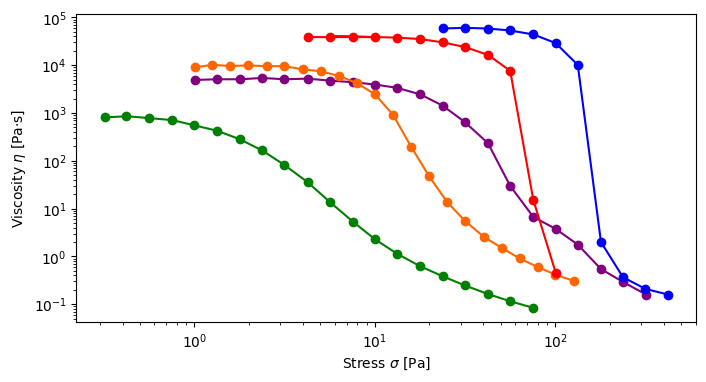

In [97]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLA,yBLA,'o-',color=(0,0.5,0))
ax.plot(xBLB,yBLB,'o-',color=(0.5,0,0.5))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xDCA,yDCA,'o-',color=(0,0,1))
ax.plot(xDCB,yDCB,'o-',color=(1,0,0))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')

In [98]:
def f(x,a0,a1):
    return a0*((x/a0)**(1/a1))**(a1-1)

In [99]:
popt, pcov = opt.curve_fit(f,xBLC,yBLC)

In [100]:
[a0,a1] = popt

In [101]:
xdata_plot = np.logspace(0,2,10)
ydata_plot = f(xdata_plot,a0,a1)

Text(0, 0.5, 'Viscosity $\\eta$ [Pa·s]')

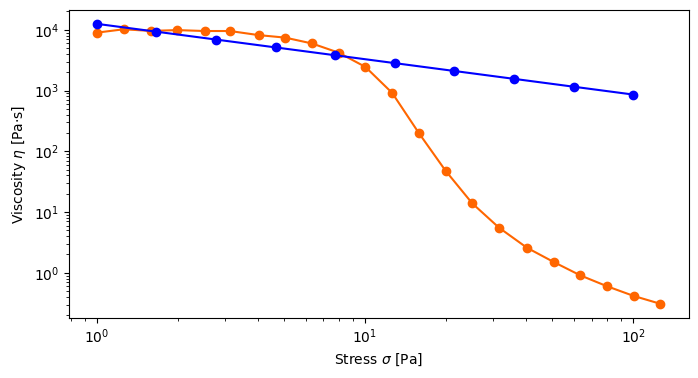

In [102]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xdata_plot,ydata_plot,'o-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')

In [103]:
shear_rate_plot= np.divide(xBLC,yBLC)   # [s-1] = stress [Pa] / viscosity [Pa·s]

In [104]:
def fC(sr,a0,a1,a2,a3): # sr being shear rate, for carreau fluids
    return a0+(a1-a0)*(1+(a2*sr)**2)**((a3-1)/2)

In [105]:
popt, pcov = opt.curve_fit(fC,shear_rate_plot,yBLC)

In [106]:
[a0,a1,a2,a3] = popt

In [107]:
#xdata_plot = np.logspace(0,2,10)
ydata_plot = fC(shear_rate_plot,a0,a1,a2,a3)

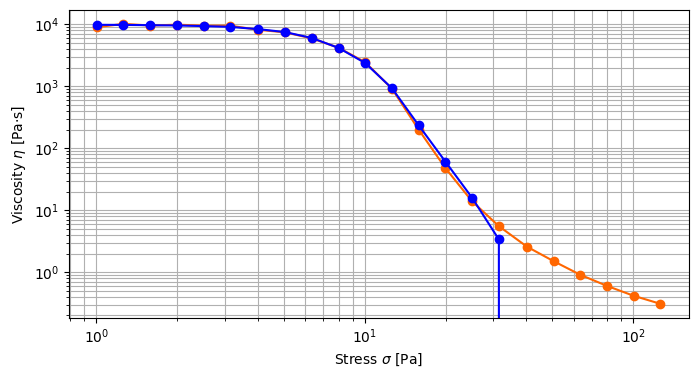

In [114]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xBLC,ydata_plot,'o-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.grid(True, which='both')

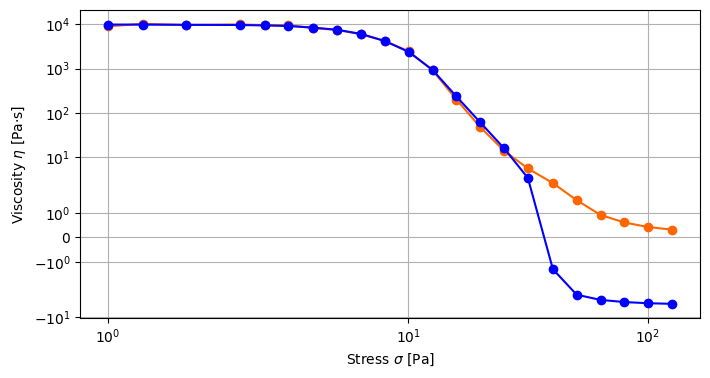

In [115]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xBLC,ydata_plot,'o-',color=(0,0,1))
ax.set_xscale('symlog')
ax.set_yscale('symlog')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.grid(True, which='both')